# Étude statistique sur la corrélation entre les données météorologiques et la consommation électrique en France en 2025

In [2]:
import numpy as np
import pandas as pd
import logging

from scrap import DataGouvFrScrapper

In [3]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [4]:
scrapper = DataGouvFrScrapper(
    dataset_id="6569b51ae64326786e4e8e1a",
    timeout=30,
    max_retries=4,
    sleep_between_retries=2.5,
    path="./data/meteofrance"
)

meteofrance_df = scrapper.build_dataframe(filter=lambda url: ("2024-2025" in url and "RR-T-Vent" in url) or ("RR-T-Vent" in url and "descriptif_champs" in url))

2025-12-31 15:02:30,760 - INFO - Fetching dataset infos from https://www.data.gouv.fr/api/1/datasets/6569b51ae64326786e4e8e1a/
2025-12-31 15:02:31,139 - INFO - File "./data/meteofrance/Q_descriptif_champs_RR-T-Vent.csv" already exists, skipping download.
2025-12-31 15:02:31,140 - INFO - Resource "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_descriptif_champs_autres-parametres.csv" filtered out, skipping download.
2025-12-31 15:02:31,140 - INFO - Resource "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_1852-1949_RR-T-Vent.csv.gz" filtered out, skipping download.
2025-12-31 15:02:31,140 - INFO - Resource "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_1852-1949_autres-parametres.csv.gz" filtered out, skipping download.
2025-12-31 15:02:31,141 - INFO - Resource "https://object.files.data.gouv.fr/meteofrance/data/synchro_ftp/BASE/QUOT/Q_01_previous-1950-2023_RR-T-Vent.csv.gz" filtered out, skipping 

In [5]:
meteofrance_df.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,AAAAMMJJ,RR,QRR,TN,QTN,...,HXI2,QHXI2,FXI3S,QFXI3S,DXI3S,QDXI3S,HXI3S,QHXI3S,DRR,QDRR
0,42005001,ST ETIENNE-BOUTHEON,45.545667,4.293833,395,20240101,0.6,1.0,1.7,1.0,...,NaN,NaN,7.4,1.0,180.0,1.0,2330.0,9.0,58.0,9.0
1,42005001,ST ETIENNE-BOUTHEON,45.545667,4.293833,395,20240102,1.2,1.0,2.9,1.0,...,NaN,NaN,17.5,1.0,190.0,1.0,1920.0,9.0,153.0,9.0
2,42005001,ST ETIENNE-BOUTHEON,45.545667,4.293833,395,20240103,0.0,1.0,9.7,1.0,...,NaN,NaN,14.9,1.0,240.0,1.0,1323.0,9.0,0.0,9.0
3,42005001,ST ETIENNE-BOUTHEON,45.545667,4.293833,395,20240104,0.0,1.0,1.3,1.0,...,NaN,NaN,8.6,1.0,190.0,1.0,2010.0,9.0,53.0,9.0
4,42005001,ST ETIENNE-BOUTHEON,45.545667,4.293833,395,20240105,7.0,1.0,5.8,1.0,...,NaN,NaN,7.4,1.0,350.0,1.0,2054.0,9.0,562.0,9.0


On regroupe la table par jour

In [12]:
temperature_quotidienne = meteofrance_df.groupby("AAAAMMJJ")

In [23]:
temp_national_quotidienne = (
    meteofrance_df
    .assign(date=pd.to_datetime(meteofrance_df['AAAAMMJJ'].astype(str), format='%Y%m%d'))
    .groupby('date', sort=True)['TM']
    .mean()
    .reset_index(name='TM_mean')
)

<Axes: title={'center': 'Température moyenne nationale quotidienne'}, xlabel='Date', ylabel='Température (°C)'>

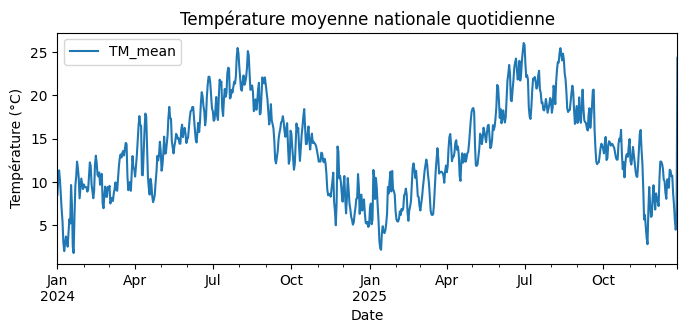

In [29]:
temp_national_quotidienne.plot(x='date', y='TM_mean', title='Température moyenne nationale quotidienne', ylabel='Température (°C)', xlabel='Date', figsize=(8, 3))